In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## EDA - Person.csv
Inicialmente, será realizada a análise exploratória de cada tabela individualmente, observando suas principais features

### Resumo da análise
- A distribuição do suitability é bem equilibrada entre os clientes, quando analisamos as 5 categorias registradas. 

- Restringindo a classificação em 'moderados', 'conservadores' e 'agressivos', é possível identificar que existe uma concentração maior de clientes que estão habilitados para fazer investimentos classificados como moderados. 

- Outro ponto importante é a presença de 447 valores nulos no suitability que foram classificados como "Não habilitado" e se considerou que os clientes não estão habilitados a nenhum tipo de investimento. 

In [3]:
person = pd.read_csv(r"C:\Users\Sávio\Desktop\estudos_prog\investimentos\person.csv")

In [4]:
person.head()

,id,name,suitability
0,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,Ana Julia Santos,conservador
1,01018c18-ecb5-4cb6-b16f-bece97935974,Emilly Moura,moderado-agressivo
2,65d3336e-dafd-4663-8a53-97792c847074,Luiz Miguel Caldeira,conservador
3,6a33c027-13f2-4fbf-8bbb-74e6438d11c8,Sarah Souza,moderado-conservador
4,55252085-c5d6-4b7d-b221-fd3ad76ba8e5,Samuel Oliveira,moderado-agressivo


In [5]:
person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2531 entries, 0 to 2530
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           2531 non-null   object
 1   name         2531 non-null   object
 2   suitability  2084 non-null   object
dtypes: object(3)
memory usage: 59.4+ KB


In [6]:
person[person.isnull().any(axis=1)]


,id,name,suitability
13,6af9c508-a57a-43cb-9ab3-2aecf18f5cea,Ana Beatriz Jesus,NaN
14,cf0c52f9-5542-495d-b1f3-02b83366c861,Lavínia Farias,NaN
16,3b273d75-dbc5-4b87-9cf0-1fe0587b349c,Luiz Otávio Azevedo,NaN
32,1ce95f5d-eaf8-464c-9809-e98eb44bebf2,Maria Julia Silva,NaN
34,d3f7da64-ef01-441f-9cbd-7c22534f586c,Srta. Rebeca da Rocha,NaN
...,...,...,...
2505,197280f3-84a2-4167-bab4-bd7f7375abce,Luiz Felipe Rocha,NaN
2507,069ea8f2-f744-4aeb-a320-fb576c50229b,Otávio Cunha,NaN
2520,b50fa919-195d-479b-911d-efc9889ca4c1,Breno Lopes,NaN
2521,9717e592-5fcc-4f58-8b69-5602e79fc16f,André Peixoto,NaN


Os valores nulos serão classificados como 'Não habilitado'

In [7]:
person.fillna('Não habilitado', inplace=True)

In [8]:
person.duplicated().sum()

0

In [9]:
person['suitability'].value_counts()

suitability
Não habilitado          447
agressivo               444
conservador             422
moderado-agressivo      420
moderado                410
moderado-conservador    388
Name: count, dtype: int64

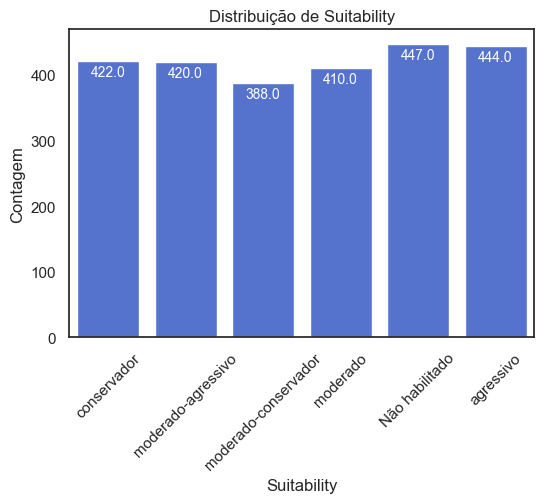

In [10]:
sns.set(style='white')
plt.figure(figsize=(6,4))

ax = sns.countplot(data=person, x='suitability', color='royalblue')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, -8), textcoords='offset points', color='w', size=10)

plt.xlabel('Suitability')
plt.ylabel('Contagem')
plt.title('Distribuição de Suitability')

plt.xticks(rotation=45);

In [11]:
moderados = person.loc[person['suitability'].isin(['moderado-agressivo', 'moderado', 'moderado-conservador'])]
conservadores = person.loc[person['suitability'].isin(['conservador','moderado-conservador'])]
agressivos = person.loc[person['suitability'].isin(['moderado-agressivo', 'agressivo'])]
n_habilitado = person.loc[person['suitability'].isin(['Não habilitado'])]

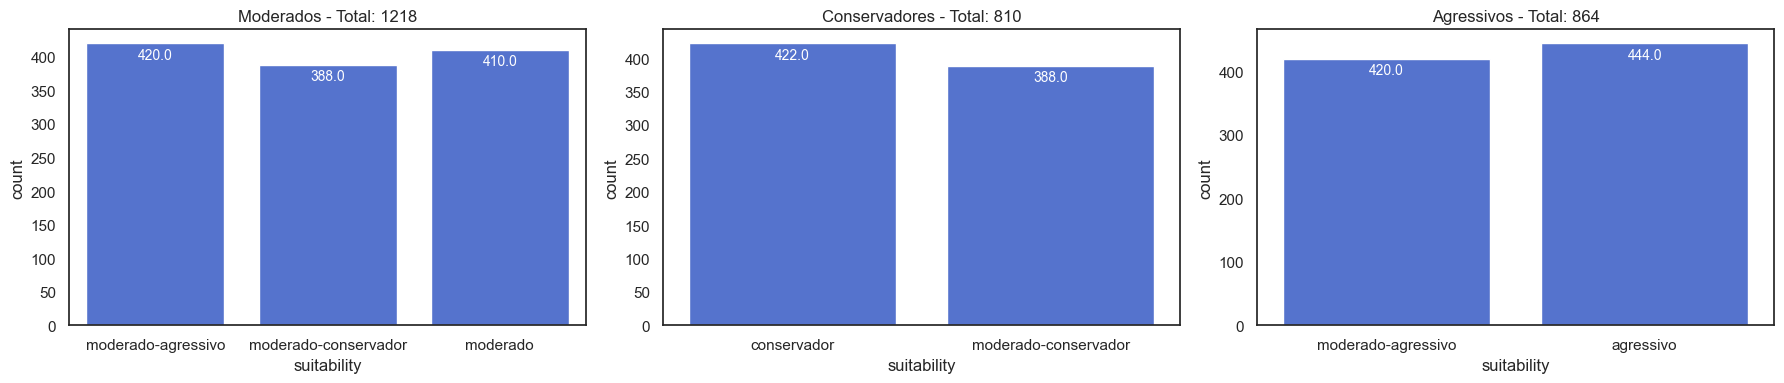

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

sns.countplot(data=moderados, x='suitability', color='royalblue', ax=axes[0])
axes[0].set_title('Moderados - Total: {}'.format(len(moderados)))
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

sns.countplot(data=conservadores, x='suitability', color='royalblue', ax=axes[1])
axes[1].set_title('Conservadores - Total: {}'.format(len(conservadores)))
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

sns.countplot(data=agressivos, x='suitability', color='royalblue', ax=axes[2])
axes[2].set_title('Agressivos - Total: {}'.format(len(agressivos)))
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=0)


for ax in axes:
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', xytext=(0, -8), textcoords='offset points', color='w', size=10)

# Ajuste de layout
plt.tight_layout()
plt.show()

Analisando as distribuições acima, podemos observar na Distribuição I que a quantidade de suitability é bem equilibrada entre os clientes. No entando, quando restrigimos os intervalos em 'moderados', 'conservadores' e 'agressivos', é possível identificar que existem uma concentração maior de clientes que estão habilitados para fazer investimentos classificados como moderados. 

Outro ponto importante é a presença de 447 clientes que não estão habilitados a nenhum tipo de investimento, recomendo entrar em contato com o setor responsável para entender melhor se esses clientes realmente não estão habilitados, ou se houve algum erro durante os registros.